Confusion Matrix:
[[99  9]
 [ 6 57]]
Accuracy: 0.91 (91%)


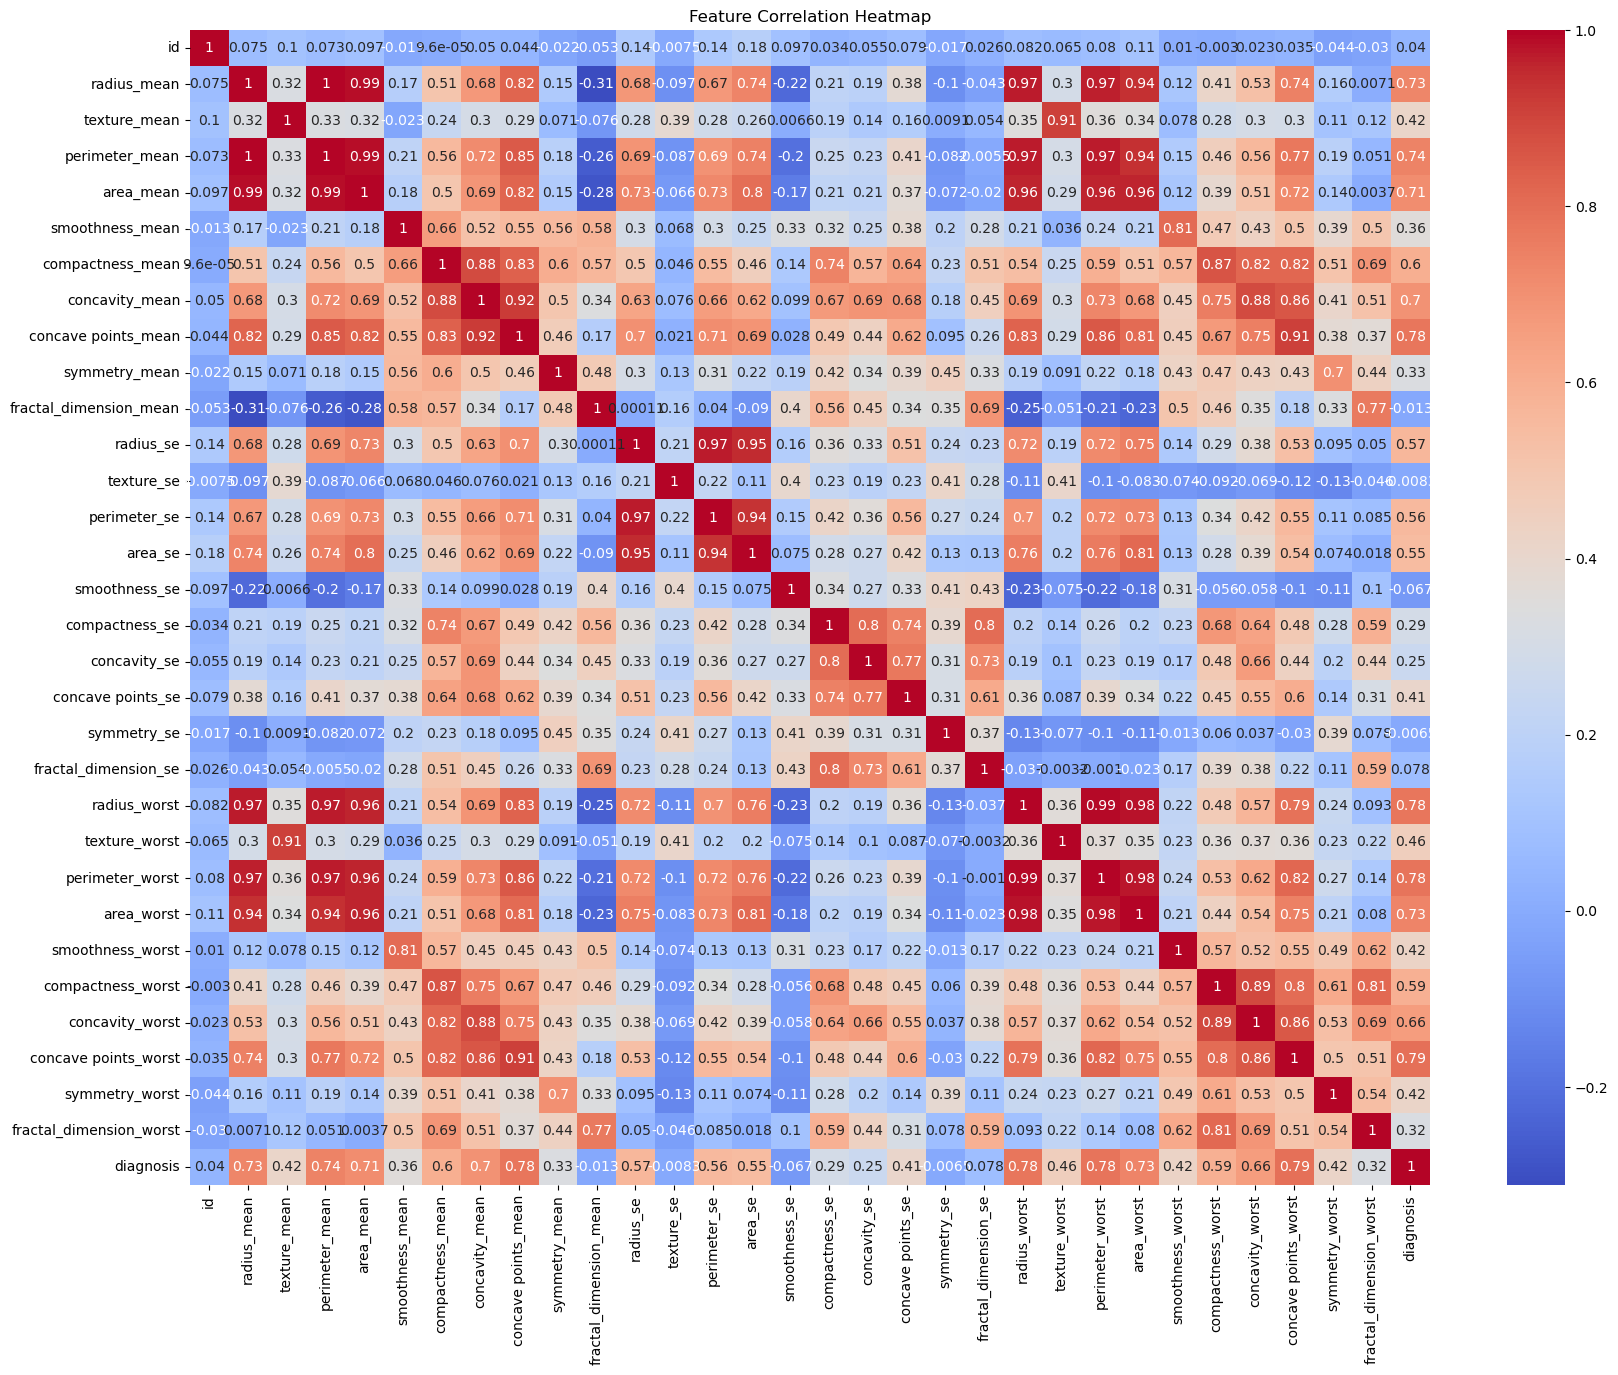

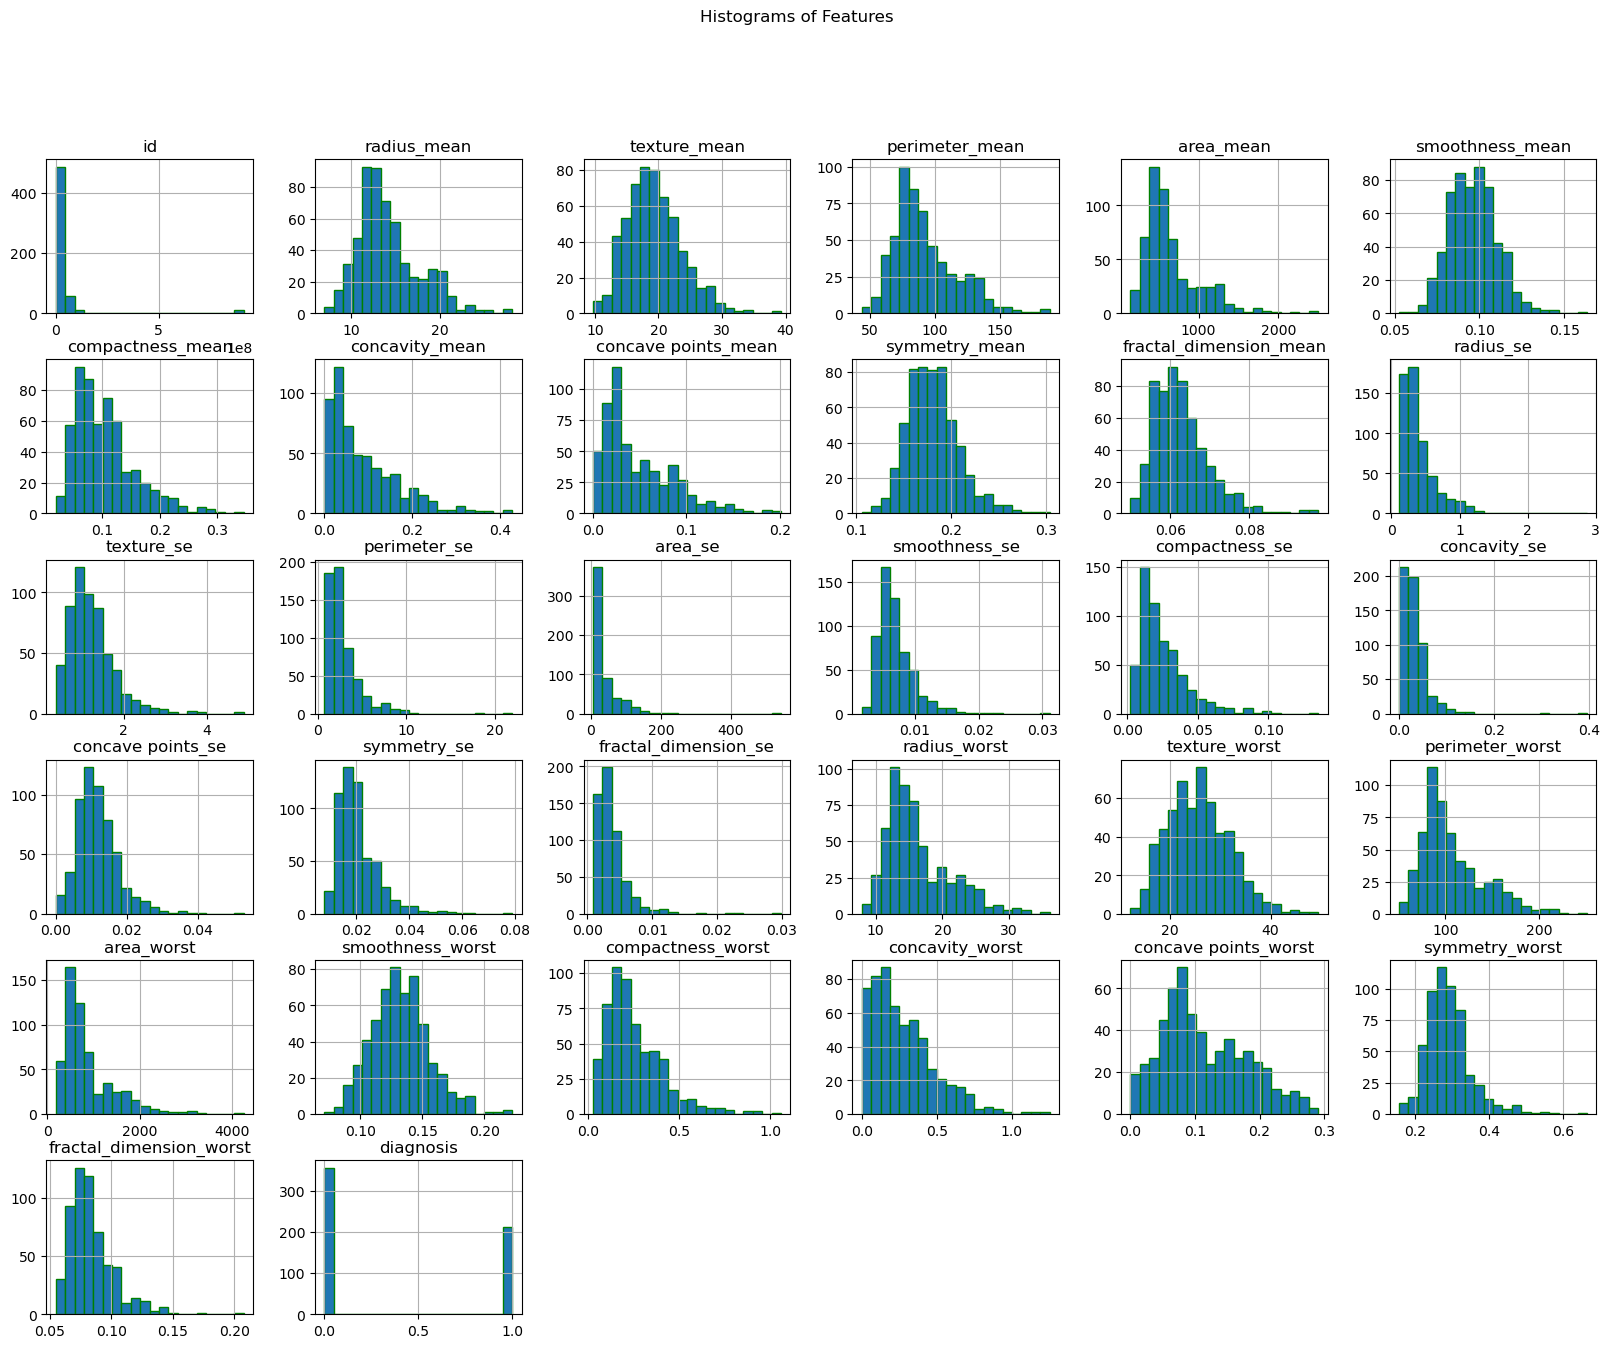

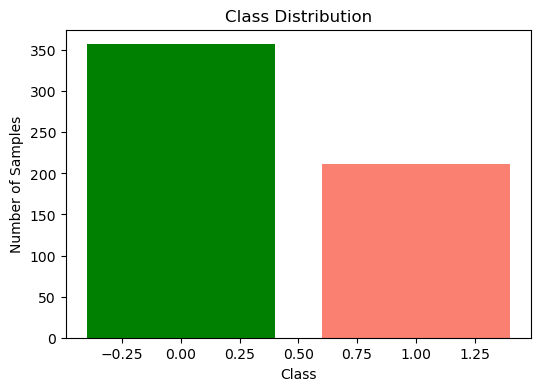

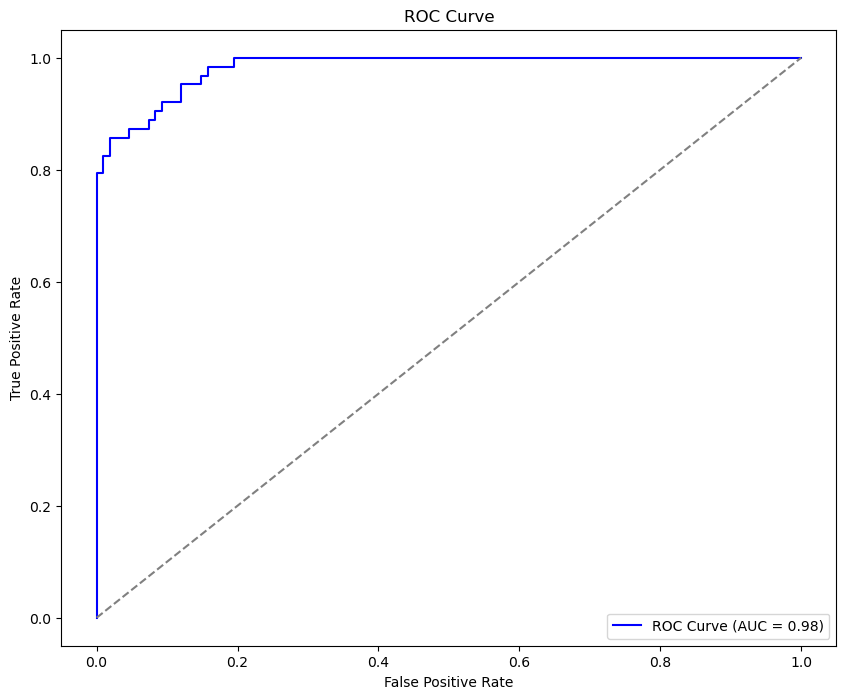

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Load dataset
dataset = pd.read_csv('Breast Cancer Detection.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predictions
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f} ({accuracy * 100:.0f}%)")

# Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Histograms of Features
dataset.hist(bins=20, figsize=(20, 15), edgecolor='green')
plt.suptitle("Histograms of Features")
plt.show()

# Class Distribution
plt.figure(figsize=(6, 4))
class_counts = dataset.iloc[:, -1].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['green', 'salmon'])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

# ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
